In [ ]:
# !git add .
# !git commit -m tolist
# !git push

In [ ]:
# !git pull

In [ ]:
# git add .
# git commit -m tolist
# git push

In [1]:
import torch
import torch.nn.functional as F

from utils import experiment, iterate
from mnist_models import ConvNet

m = ConvNet()
m = m.to('cuda' if torch.cuda.is_available() else 'cpu')

# ckpt = 'checkpoints/ConvNet.pt'
ckpt = 'checkpoints/ConvNet_TRADES.pt'
# ckpt = 'checkpoints/ConvNet_CVaR.pt'

m.load_state_dict({k:torch.load(ckpt)[k] for k in m.state_dict()})



<All keys matched successfully>

In [2]:
with torch.no_grad():
    outputs = iterate.predict(m,
                              iterate.mnist_delta_predict_step_l2,
                              device = 'cuda',
                              val_set = experiment.train_set,
                              batch_size = 1000
                             )
print(outputs.keys(), outputs['predictions'])


dict_keys(['predictions', 'correct', 'samples']) [11.05000114440918, 8.65000057220459, 13.750001907348633, 7.150002479553223, 7.550001621246338, 17.999998092651367, 5.700000286102295, 14.899999618530273, 8.64999771118164, 10.05000114440918, 12.899998664855957, 8.70000171661377, 17.050003051757812, 13.700000762939453, 5.550001621246338, 11.400004386901855, 20.0, 20.0, 10.35000228881836, 7.5500006675720215, 10.049997329711914, 10.349998474121094, 6.150001049041748, 7.850001335144043, 5.850000381469727, 11.199999809265137, 12.600003242492676, 18.14999771118164, 18.69999885559082, 6.600002765655518, 12.40000057220459, 20.0, 14.049999237060547, 7.399999618530273, 9.850001335144043, 11.000000953674316, 8.5, 11.750001907348633, 10.700004577636719, 13.200002670288086, 8.950000762939453, 20.0, 5.849997520446777, 8.300002098083496, 14.450000762939453, 11.100000381469727, 20.0, 9.700000762939453, 5.650001525878906, 15.90000057220459, 16.19999885559082, 13.150001525878906, 9.800000190734863, 6.600

In [17]:
outputs['predictions'][0]

11.05000114440918

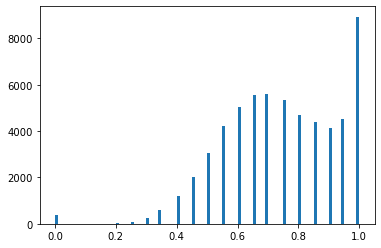

In [4]:
import matplotlib.pyplot as plt

plt.hist(outputs['correct'], bins = 100)
plt.show()

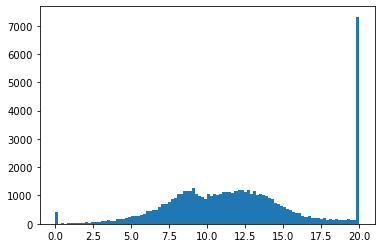

In [6]:
plt.hist(outputs['predictions'], bins = 100)
plt.show()

In [9]:
import numpy as np
from sklearn.neighbors import KDTree


In [20]:
train_X = experiment.train_set.data / 255
train_X = train_X.view(len(train_X), -1).numpy()
train_tree = KDTree(train_X, leaf_size=2)              


In [31]:
test_X = experiment.val_set.data / 255
test_X = test_X.view(len(test_X), -1).numpy()
test_tree = KDTree(test_X, leaf_size=2)              


In [38]:
from tqdm.notebook import trange
all_in = set()
for i in trange(len(train_X)):
    ind = test_tree.query_radius(train_X[i:i+1], r=outputs['predictions'][i])
    all_in.update(set(ind[0].tolist()))
    if len(all_in) == len(test_X):
        break

# ind = tree.query_radius(X[:1], r=0.3)  
# print(ind)  # indices of neighbors within distance 0.3


  0%|          | 0/60000 [00:00<?, ?it/s]

In [39]:
len(all_in)

10000